# Grammatiche e derivazioni

## Tipo 0

In [1]:
from liblet import Grammar, iter2table, Derivation, ProductionGraph

In [2]:
# fig 2.3, pag. 14

type0 = """
Sentence -> Name | List End
List -> Name | Name , List
Name -> tom | dick | harry
, Name End -> and Name
"""

In [3]:
G_type0 = Grammar.from_string(type0, False)
G_type0

Grammar(N={End, List, Name, Sentence}, T={,, and, dick, harry, tom}, P=(Sentence -> Name, Sentence -> List End, List -> Name, List -> Name , List, Name -> tom, Name -> dick, Name -> harry, , Name End -> and Name), S=Sentence)

In [4]:
iter2table(G_type0.P)

In [5]:
d = Derivation(G_type0).step(1, 0).step(3, 0).step(3, 2).step(2, 4).step(7, 3).step(4, 0).step(5, 2).step(6, 4)
d

Sentence -> List End -> Name , List End -> Name , Name , List End -> Name , Name , Name End -> Name , Name and Name -> tom , Name and Name -> tom , dick and Name -> tom , dick and harry

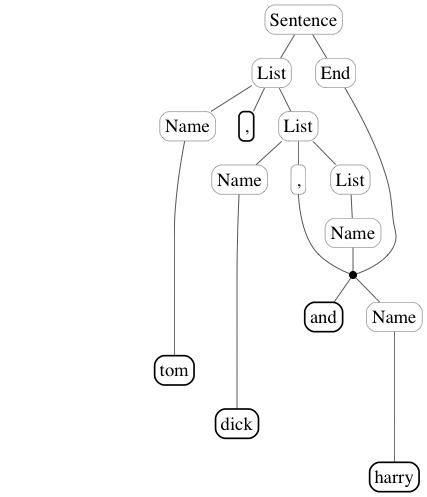

In [6]:
ProductionGraph(d)

## Tipo 1

### Monotone

In [7]:
# pag 20

monotonic = """
Sentence -> Name | List
List -> EndName | Name , List
Name -> tom | dick | harry
, EndName -> and Name
"""

### Context-sentitive

In [8]:
# pag 20

context_sensitive = """
Sentence -> Name | List
List -> EndName | Name Comma List
Name -> tom | dick | harry
Comma EndName -> and EndName
and EndName -> and Name
Comma -> ,
"""

In [9]:
G_cs = Grammar.from_string(context_sensitive, False)
G_cs

Grammar(N={Comma, EndName, List, Name, Sentence}, T={,, and, dick, harry, tom}, P=(Sentence -> Name, Sentence -> List, List -> EndName, List -> Name Comma List, Name -> tom, Name -> dick, Name -> harry, Comma EndName -> and EndName, and EndName -> and Name, Comma -> ,), S=Sentence)

In [10]:
iter2table(G_cs.P)

Sentence -> List -> Name Comma List -> Name Comma Name Comma List -> Name Comma Name Comma EndName -> Name Comma Name and EndName -> Name Comma Name and Name -> tom Comma Name and Name -> tom Comma dick and Name -> tom Comma dick and harry -> tom , dick and harry


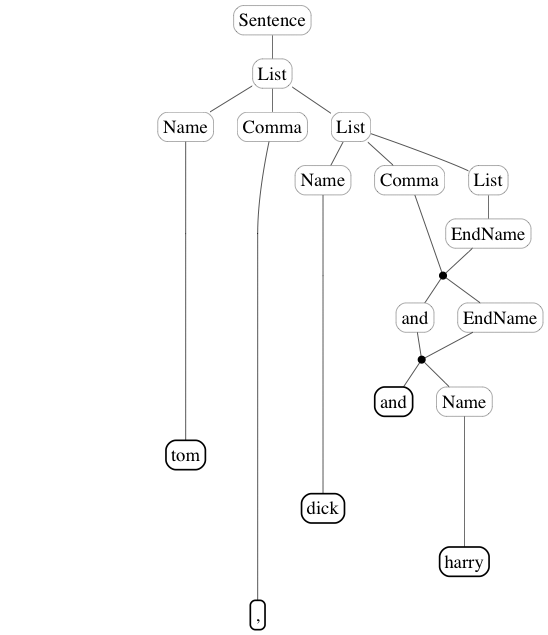

In [11]:
d = Derivation(G_cs).step(1, 0).step(3, 0).step(3, 2).step(2, 4).step(7, 3).step(8, 3).step(4, 0).step(5, 2).step(6, 4).step(9, 1)
print(d)
ProductionGraph(d)

## Intermezzo

In [12]:
# fig. 2.7, pag. 22

anbncn = """
S -> a b c
S -> a S Q
b Q c -> b b c c
c Q -> Q c
"""

In [13]:
G_anbncn = Grammar.from_string(anbncn, False)
iter2table(G_anbncn.P)

S -> a S Q -> a a S Q Q -> a a a b c Q Q -> a a a b Q c Q -> a a a b b c c Q -> a a a b b c Q c -> a a a b b Q c c -> a a a b b b c c c


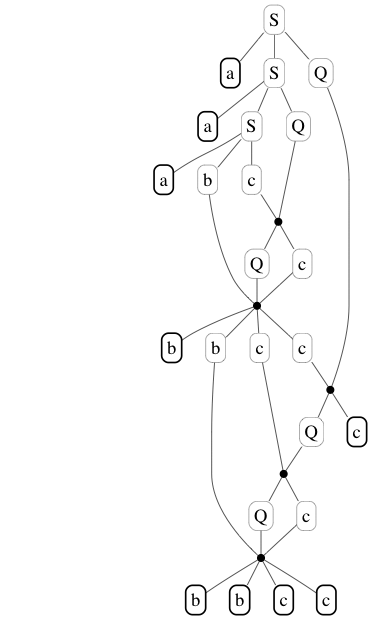

In [14]:
d = d = Derivation(G_anbncn).step(1, 0).step(1, 1).step(0, 2).step(3, 4).step(2, 3).step(3, 6).step(3, 5).step(2, 4)
print(d)
ProductionGraph(d)